In [7]:
import numpy as np

def grid_search(x, y, intercept_range, slope_range, resolution):
    intercepts = np.linspace(intercept_range[0], intercept_range[1], resolution)
    slopes = np.linspace(slope_range[0], slope_range[1], resolution)
    sse_grid = np.zeros((resolution, resolution))
    
    for i, intercept in enumerate(intercepts):
        for j, slope in enumerate(slopes):
            y_pred = intercept + slope * x
            sse = np.sum((y - y_pred) ** 2)
            sse_grid[i, j] = sse
    
    best_sse = np.min(sse_grid)
    min_idx = np.unravel_index(np.argmin(sse_grid), sse_grid.shape)
    best_intercept = intercepts[min_idx[0]]
    best_slope = slopes[min_idx[1]]
    return best_intercept, best_slope, sse_grid, intercepts, slopes, best_sse

In [8]:
# Example dataset generation
np.random.seed(42)
x = np.random.uniform(0, 10, 100)  # Number of courses
true_intercept = 23
true_slope = 3.7
noise = np.random.normal(0, 2, size=x.shape)
y = true_intercept + true_slope * x + noise  # Life satisfaction

In [9]:
X = np.vstack([np.ones_like(x), x]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
analytic_intercept, analytic_slope = beta

print("Analytic result:")
print(f"Intercept: {analytic_intercept:.2f}, slope: {analytic_slope:.2f}")

Analytic result:
Intercept: 23.43, slope: 3.61


Resolution 20: Best SSE: 322.6899849722842
Resolution 20: Best intercept: 23.42, best slope: 3.61
Resolution 20: Computation time = 0.01 seconds


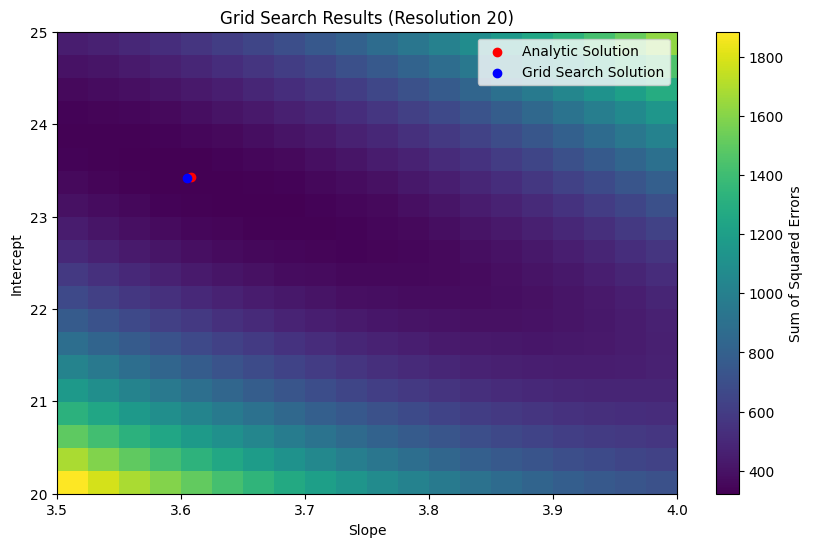

Resolution 50: Best SSE: 322.67743400249685
Resolution 50: Best intercept: 23.47, best slope: 3.60
Resolution 50: Computation time = 0.03 seconds


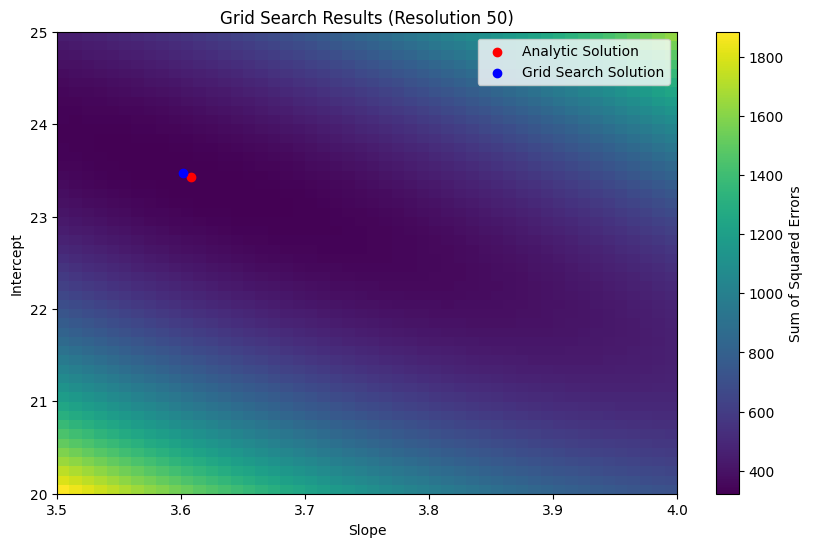

Resolution 100: Best SSE: 322.63996099273425
Resolution 100: Best intercept: 23.43, best slope: 3.61
Resolution 100: Computation time = 0.11 seconds


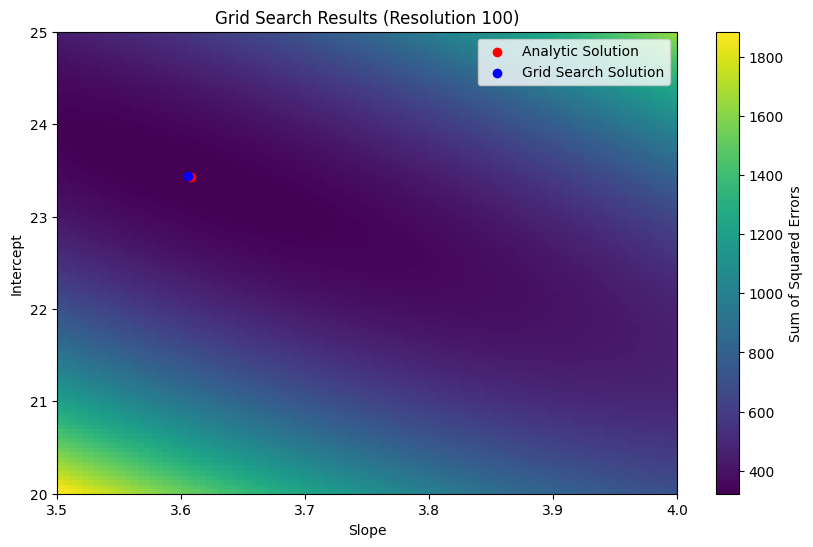

Resolution 500: Best SSE: 322.6344934621969
Resolution 500: Best intercept: 23.43, best slope: 3.61
Resolution 500: Computation time = 2.00 seconds


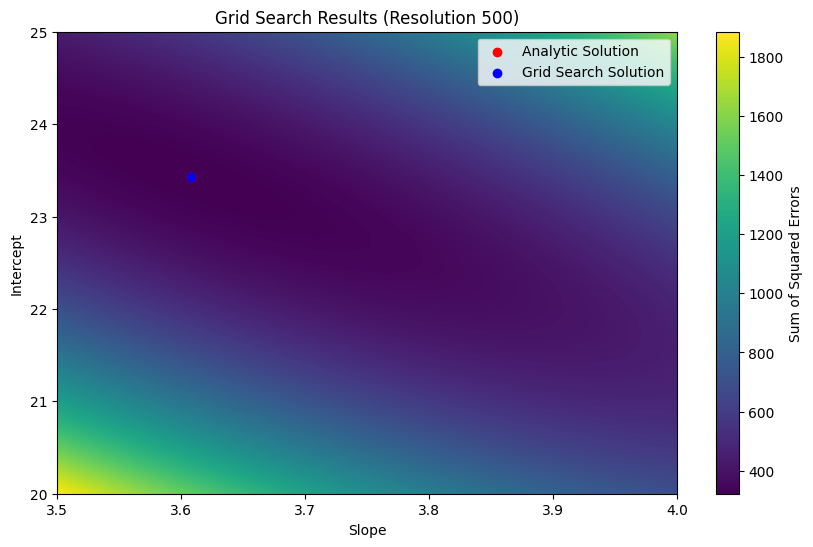

In [10]:
import time
import matplotlib.pyplot as plt


for resolution in [20, 50, 100, 500]:
    start_time = time.time()
    best_intercept, best_slope, sse_grid, intercepts, slopes, best_sse = grid_search(
        x, y, [20, 25], [3.5, 4.0], resolution)
    end_time = time.time()
    print(f"Resolution {resolution}: Best SSE: {best_sse}")
    print(f"Resolution {resolution}: Best intercept: {best_intercept:.2f}, best slope: {best_slope:.2f}")
    print(f"Resolution {resolution}: Computation time = {end_time - start_time:.2f} seconds")
    
    plt.figure(figsize=(10, 6))
    plt.imshow(sse_grid, extent=[3.5, 4.0, 20, 25], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='Sum of Squared Errors')
    plt.scatter(analytic_slope, analytic_intercept, color='red', label='Analytic Solution', zorder=3)
    plt.scatter(best_slope, best_intercept, color='blue', label='Grid Search Solution', zorder=3)
    plt.xlabel('Slope')
    plt.ylabel('Intercept')
    plt.title(f'Grid Search Results (Resolution {resolution})')
    plt.legend()
    plt.show()

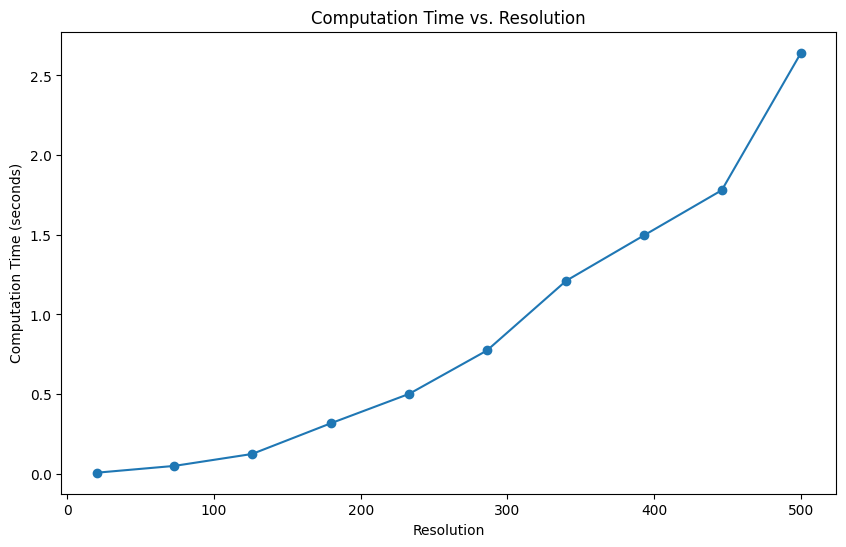

In [11]:
resolutions = np.linspace(20, 500, 10, dtype=int)
resolution_computation_time = {}


for resolution in resolutions:
    start_time = time.time()
    best_intercept, best_slope, sse_grid, intercepts, slopes, _ = grid_search(
        x, y, [20, 25], [3.5, 4.0], resolution)
    end_time = time.time()
    resolution_computation_time[resolution] = end_time - start_time
    
plt.figure(figsize=(10, 6))
plt.plot(resolutions, list(resolution_computation_time.values()), marker='o')
plt.xlabel('Resolution')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs. Resolution')
plt.show()

Empirical result:
Intercept: 23.42, slope: 3.61
Max R^2: 0.9725


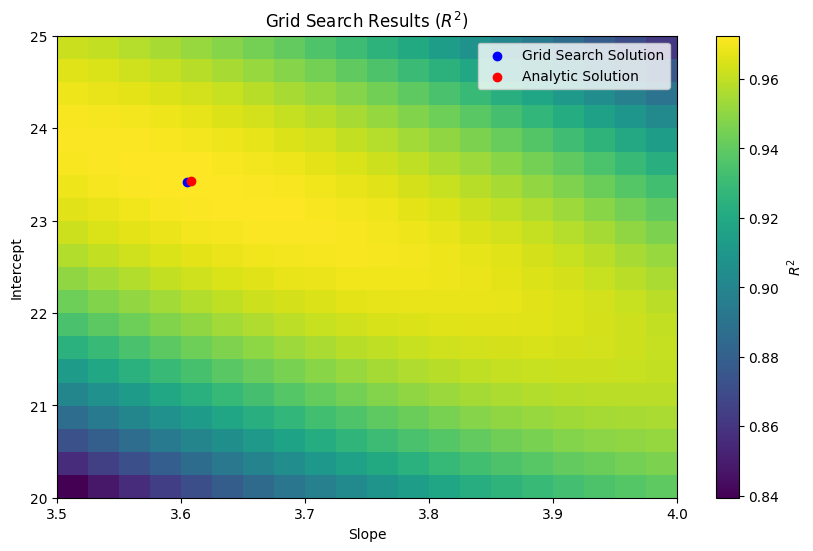

Empirical result:
Intercept: 23.47, slope: 3.60
Max R^2: 0.9725


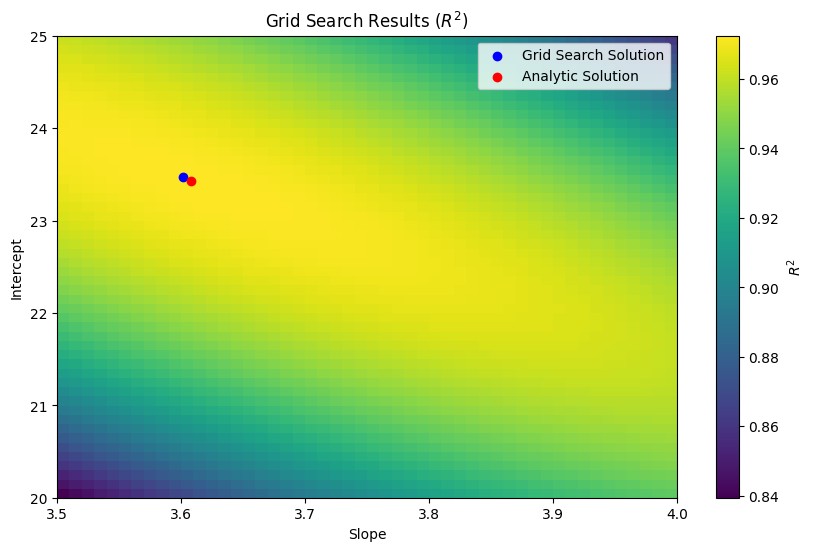

Empirical result:
Intercept: 23.43, slope: 3.61
Max R^2: 0.9725


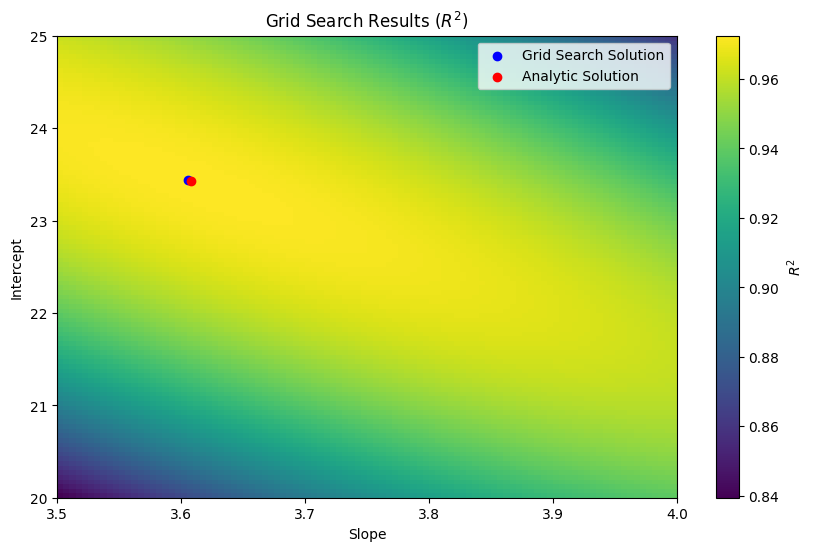

Empirical result:
Intercept: 23.43, slope: 3.61
Max R^2: 0.9725


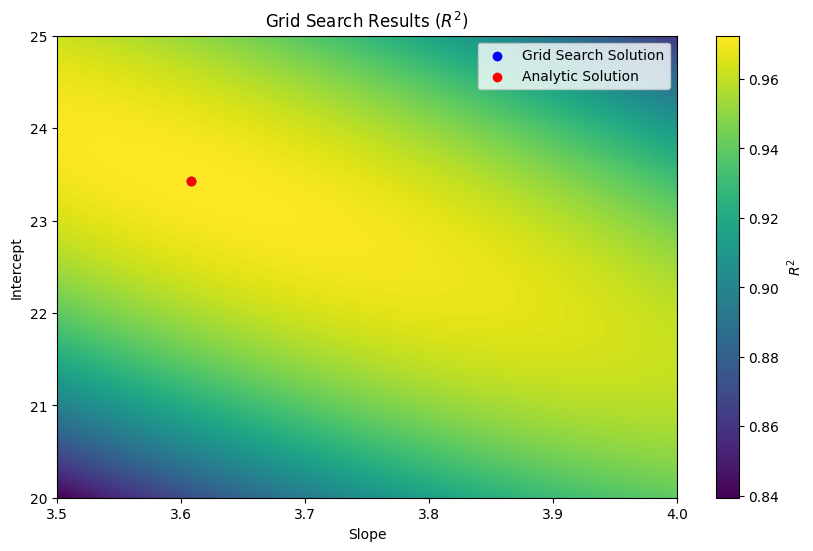

In [12]:
def grid_search_r2(x, y, intercept_range, slope_range, resolution):
    intercepts = np.linspace(intercept_range[0], intercept_range[1], resolution)
    slopes = np.linspace(slope_range[0], slope_range[1], resolution)
    r2_grid = np.zeros((resolution, resolution))
    predictions = np.zeros((resolution, resolution, len(x)))
    
    y_mean = np.mean(y)
    tss = np.sum((y - y_mean) ** 2) 
    
    for i, intercept in enumerate(intercepts):
        for j, slope in enumerate(slopes):
            y_pred = intercept + slope * x
            predictions[i, j] = y_pred
            sse = np.sum((y - y_pred) ** 2)
            r2 = 1 - (sse / tss)
            r2_grid[i, j] = r2
    
    max_idx = np.unravel_index(np.argmax(r2_grid), r2_grid.shape)
    best_intercept = intercepts[max_idx[0]]
    best_slope = slopes[max_idx[1]]
    return best_intercept, best_slope, r2_grid, intercepts, slopes, predictions

resolutions = [20, 50, 100, 500]

for resolution in resolutions:
    best_intercept, best_slope, r2_grid, intercepts, slopes, predictions = grid_search_r2(
        x, y, [20, 25], [3.5, 4.0], resolution)

    print("Empirical result:")
    print(f"Intercept: {best_intercept:.2f}, slope: {best_slope:.2f}")
    print(f"Max R^2: {np.max(r2_grid):.4f}")

    plt.figure(figsize=(10, 6))
    plt.imshow(r2_grid, extent=[3.5, 4.0, 20, 25], origin='lower', aspect='auto', cmap='viridis')
    plt.colorbar(label='$R^2$')
    plt.scatter(best_slope, best_intercept, color='blue', label='Grid Search Solution', zorder=3)
    plt.scatter(analytic_slope, analytic_intercept, color='red', label='Analytic Solution', zorder=3)
    plt.xlabel('Slope')
    plt.ylabel('Intercept')
    plt.title('Grid Search Results ($R^2$)')
    plt.legend()
    plt.show()